In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [2]:
#data_preprocessing

data = pd.read_csv('spamham.csv')

In [3]:
data.head(3)


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [4]:
data.shape

(5572, 2)

In [5]:
data = data.where((pd.notnull(data)),'')

In [6]:
data.shape

(5572, 2)

In [26]:
data.head(3)

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...


In [8]:
#change ham=1 spam=0
data.loc[data['Category']=='spam','Category']=0
data.loc[data['Category']=='ham','Category']=1

In [27]:
data.head(3)

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...


In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
import seaborn as sns

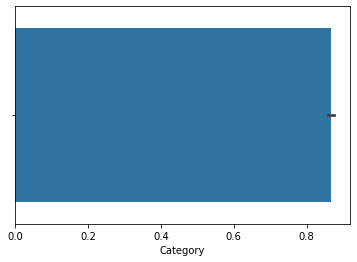

In [40]:
sns.barplot(data['Category'])

In [10]:
#data assign to x and y

x=data['Message']
y=data['Category']


In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=101)

In [12]:
model = LinearSVC()

In [13]:
feature = TfidfVectorizer(min_df=1,stop_words='english',lowercase='True')
x_train_feature = feature.fit_transform(x_train)
x_test_feature = feature.transform(x_test)

In [14]:
#y data conv to int type
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [15]:
#training svm

In [16]:
model = LinearSVC()

In [17]:
model.fit(x_train_feature,y_train)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [18]:
#evaluation

In [19]:
pred=model.predict(x_test_feature)

In [20]:
acc=accuracy_score(y_test,pred)

In [21]:
acc

0.9755495737999103

In [22]:
pred_tr=model.predict(x_train_feature)
acc_tr=accuracy_score(y_train,pred_tr)
acc_tr

1.0

In [23]:
input1=["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."]
input1=pd.DataFrame(input1)
input1

,0
0,"Go until jurong point, crazy.. Available only ..."


In [24]:
input1=feature.transform(input1[0])

In [25]:
prediction=model.predict(input1)
if prediction==1:
    print('ham')
else:
    print('spam')

ham
